# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Face and Eye Detection with Haar Cascade Classifiers</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ To use a Haarcascade Classifier to detect faces <br>
2️⃣ To use a Haarcascade Classifier to detect eyes <br>
3️⃣ To use a Haarcascade Classifier to detect faces and eyes from your webcam in Colab <br>
</p>

In [4]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **HAAR Cascade Classifiers** ###

<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Robin\AppData\Local\Temp\ipykernel_26416\1544306041.py:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


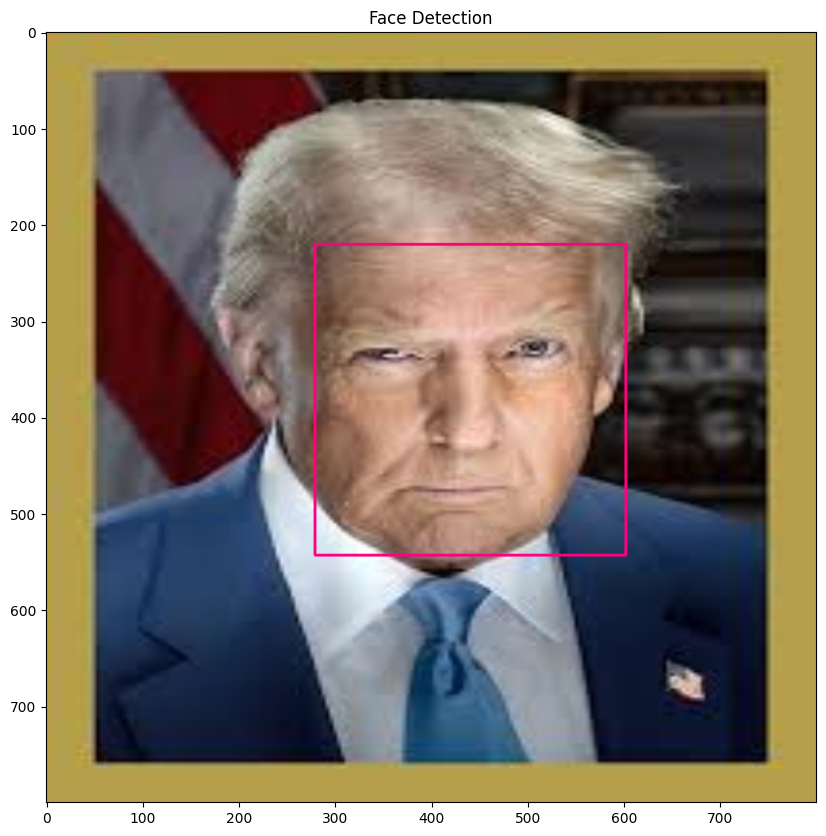

In [38]:
# We point OpenCV's CascadeClassifier function to where our
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier("haar_cascade_classifiers/haarcascade_frontalface_default.xml")

# Load our image then convert it to grayscale
image = cv2.imread("../images/Trump.jpg")
resized = cv2.resize(image, (800, 800))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordinates
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

# When no faces detected, face_classifier returns an empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(resized, (x,y), (x+w,y+h), (127,0,255), 2)

imshow("Face Detection", resized)

### **Simple Eye & Face Detection using Haarcascade Classifiers** ###

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Robin\AppData\Local\Temp\ipykernel_26416\2677474965.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


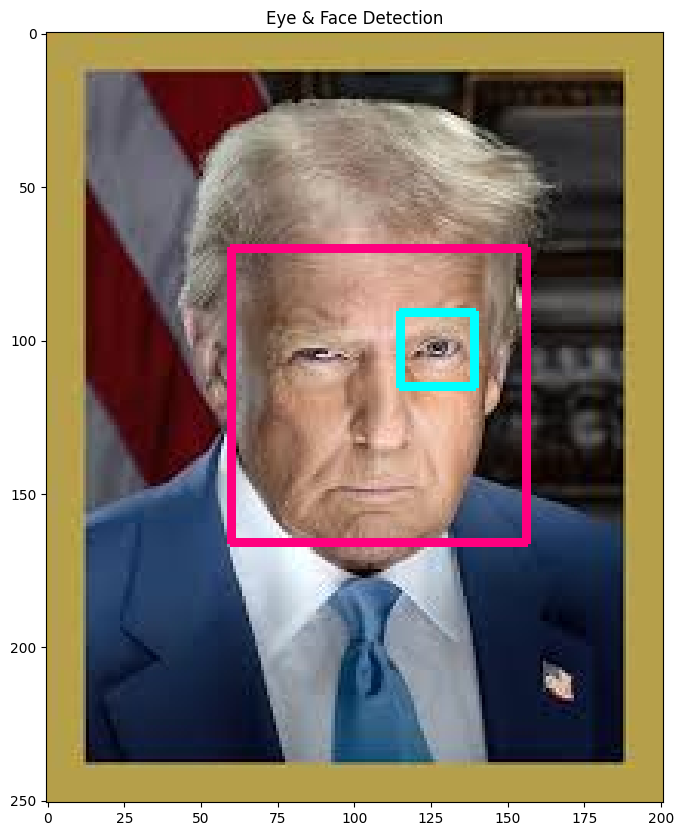

In [46]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier("haar_cascade_classifiers/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("haar_cascade_classifiers/haarcascade_eye.xml")

img = cv2.imread("../images/Trump.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 2.0, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.1, 3)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255,255,0),2)

imshow("Eye & Face Detection", img)

### **Using Colab's Code Snippets let's access the webcam for an input** ###

In [2]:
import cv2

def take_photo(filename="photo.jpg"):
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise RuntimeError("Could not open webcam")

    print("Press SPACE to capture. Press ESC to exit.")

    while True:
        ret, frame = cap.read()
        cv2.imshow("Webcam", frame)

        key = cv2.waitKey(1)

        if key == 27:   # ESC = exit
            break
        elif key == 32: # SPACE = capture
            cv2.imwrite(filename, frame)
            print(f"Saved: {filename}")
            break

    cap.release()
    cv2.destroyAllWindows()

take_photo()


Press SPACE to capture. Press ESC to exit.
Saved: photo.jpg


<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Robin\AppData\Local\Temp\ipykernel_28456\1714485272.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


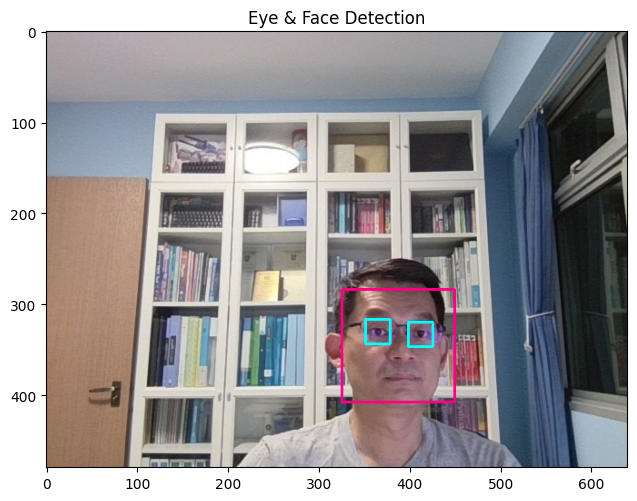

In [5]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier("haar_cascade_classifiers/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("haar_cascade_classifiers/haarcascade_eye.xml")

img = cv2.imread("../images/photo.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.1, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.1, 3)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255,255,0),2)

imshow("Eye & Face Detection", img)

### **Bonus Code - Use your webcam to do live face and eye detection** ###

In [1]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier("haar_cascade_classifiers/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("haar_cascade_classifiers/haarcascade_eye.xml")

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1, 5)
    if faces is ():
        return img
    
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray, 1.1, 3)

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,0,255), 2)

    roi_color = cv2.flip(roi_color, 1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow("Our Face Extractor", face_detector(frame))
    if cv2.waitKey(1) == 13: # 13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Robin\AppData\Local\Temp\ipykernel_28456\3761909138.py:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
